In [1]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  
  return list(uploaded.keys())

In [2]:
upload_files()

Saving flower.jpeg to flower.jpeg


['flower.jpeg']

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('flower.jpeg')

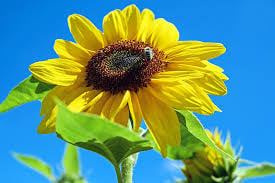

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

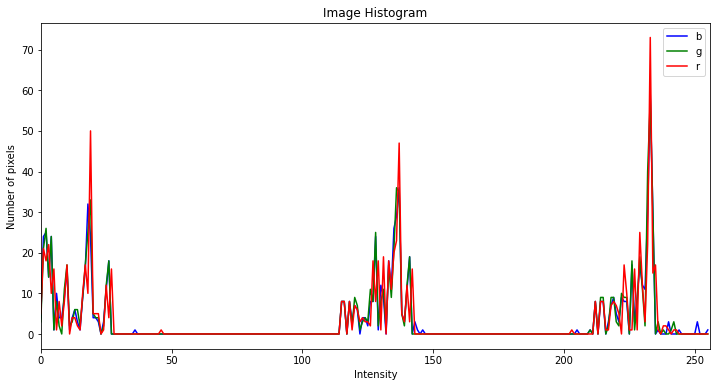

In [5]:
plt.figure(figsize = (12, 6))

color = ['b', 'g', 'r']
for i, col in enumerate(color):
  imgHist = cv2.calcHist(img, [i], None, [256], [0, 256])
  plt.plot(imgHist, color = col, label = col)
  plt.xlim([0, 256])

plt.title('Image Histogram')
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.legend()
plt.show()


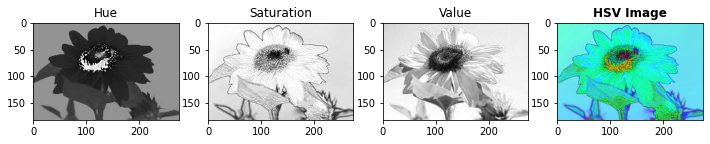

In [6]:
hsvImg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsvImg[:, :, 0]
s = hsvImg[:, :, 1]
v = hsvImg[:, :, 2]

plt.figure(figsize = (12, 6))
plt.subplot(141)
plt.imshow(h, cmap = 'gray')
plt.title('Hue')

plt.subplot(142)
plt.imshow(s, cmap = 'gray')
plt.title('Saturation')

plt.subplot(143)
plt.imshow(v, cmap = 'gray')
plt.title('Value')

plt.subplot(144)
plt.imshow(hsvImg)
plt.title('HSV Image', fontweight = 'bold')

plt.show()

In [27]:
greenMask = cv2.inRange(hsvImg, (36, 0, 0), (70, 255, 255))
yellowMask = cv2.inRange(hsvImg, (20, 0, 0), (35, 255, 255))
brownMask = cv2.inRange(hsvImg, (0, 0, 0), (35, 255, 255))

leafAndPetalMask = cv2.bitwise_or(greenMask, yellowMask)

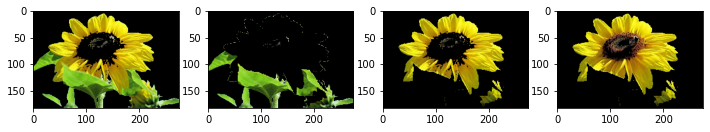

In [28]:
plt.figure(figsize = (12, 6))

plt.subplot(141)
temp = cv2.bitwise_and(img, img, mask = leafAndPetalMask)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))

plt.subplot(142)
temp = cv2.bitwise_and(img, img, mask = greenMask)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))

plt.subplot(143)
temp = cv2.bitwise_and(img, img, mask = yellowMask)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))

plt.subplot(144)
temp = cv2.bitwise_and(img, img, mask = brownMask)
plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))

plt.show()